In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL /glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [8]:
print(X_train.value_counts().sum())

149


In [9]:
print(X_test.value_counts().sum())

65


In [10]:
print(y_train.value_counts().sum())

149


In [11]:
print(y_test.value_counts().sum())

65


In [12]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Dense(64, activation="relu",input_shape=(X.shape[1],)))
model.add(Dense(64 , activation="relu"))
model.add(Dense(64 , activation="relu"))
model.add(Dense(32 , activation="relu"))
model.add(Dense(32 , activation="relu"))
model.add(Dense(8 ,activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
Total params: 12,360
Trainable params: 12,360
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [18]:
history = model.fit(X_train_ss,y_train, validation_data=(X_test_ss,y_test),epochs=100,batch_size=50)

Epoch 1/100
3/3 [==============================] - 1s 238ms/step - loss: 2.1009 - val_loss: 2.0458
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 2.0336 - val_loss: 1.9967
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 1.9927 - val_loss: 1.9526
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 1.9328 - val_loss: 1.9020
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 1.8816 - val_loss: 1.8430
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 1.8280 - val_loss: 1.7768
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 1.7142 - val_loss: 1.7037
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 1.6473 - val_loss: 1.6274
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 1.6097 - val_loss: 1.5425
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 1.5234 - val_loss: 1.4492
Epoch 11/100
3/3 [

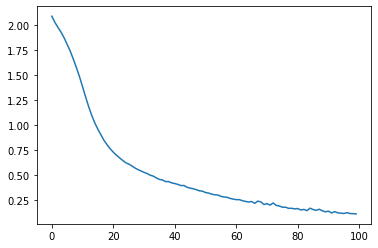

In [19]:
plt.plot(history.history["loss"])

In [20]:
y_pred = model.predict(X_test_ss)

In [21]:
y_pred

array([[5.35793229e-29, 7.98493339e-23, 1.00000000e+00, 2.36435213e-23,
        1.73123076e-29, 1.08385184e-14, 1.73021178e-24, 6.52902552e-25],
       [2.44735838e-05, 7.01957762e-01, 2.91834742e-01, 5.72211901e-03,
        1.50133894e-06, 2.71858822e-04, 4.69311908e-06, 1.82853895e-04],
       [1.72828697e-06, 8.39413881e-01, 1.60305277e-01, 1.14755167e-04,
        2.27567813e-08, 5.40903638e-05, 6.12611984e-07, 1.09615597e-04],
       [1.95664802e-06, 5.32536244e-04, 9.98715043e-01, 5.68738964e-04,
        1.07495589e-06, 1.01143138e-04, 7.16192444e-05, 7.89228034e-06],
       [9.33598931e-05, 1.50967576e-02, 8.89166653e-01, 9.33595598e-02,
        1.10271205e-04, 1.78218877e-03, 1.49854444e-04, 2.41395086e-04],
       [1.48712737e-12, 9.11884346e-10, 3.36767475e-10, 9.80853648e-18,
        3.01501784e-14, 1.83797113e-06, 1.80134492e-07, 9.99997973e-01],
       [2.31841199e-07, 9.98397052e-01, 1.52822491e-03, 6.43919848e-05,
        7.50191820e-09, 7.58948772e-07, 1.02401330e-07, 9.

In [22]:
y_pred = y_pred.argmax(axis=1)

In [23]:
y_pred

array([2, 1, 1, 2, 2, 7, 1, 2, 2, 2, 1, 2, 2, 2, 3, 1, 1, 7, 1, 7, 1, 1,
       2, 5, 2, 1, 5, 7, 1, 5, 1, 1, 2, 2, 7, 2, 7, 2, 2, 1, 2, 1, 7, 5,
       1, 6, 1, 1, 1, 3, 2, 1, 1, 6, 2, 2, 2, 1, 2, 2, 1, 1, 1, 7, 1])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.86      0.77        21
           2       0.78      0.78      0.78        23
           3       0.50      0.20      0.29         5
           5       1.00      1.00      1.00         4
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.78        65
   macro avg       0.83      0.73      0.76        65
weighted avg       0.79      0.78      0.78        65

